# Домашнее задание. Pandas

In [6]:
import pandas as pd
df = pd.read_csv('data/TSLA.csv');

1. Вывести все колонки из DataFrame

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


2. Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [28]:
print(f"Average price is: {df.loc[df['Date'] < '2012-01-10', 'Close'].mean()}")

Average price is: 25.649379816537472


3. Вывести график цены закрытия 

<Axes: title={'center': 'Close(Date) function'}, xlabel='Date', ylabel='Price'>

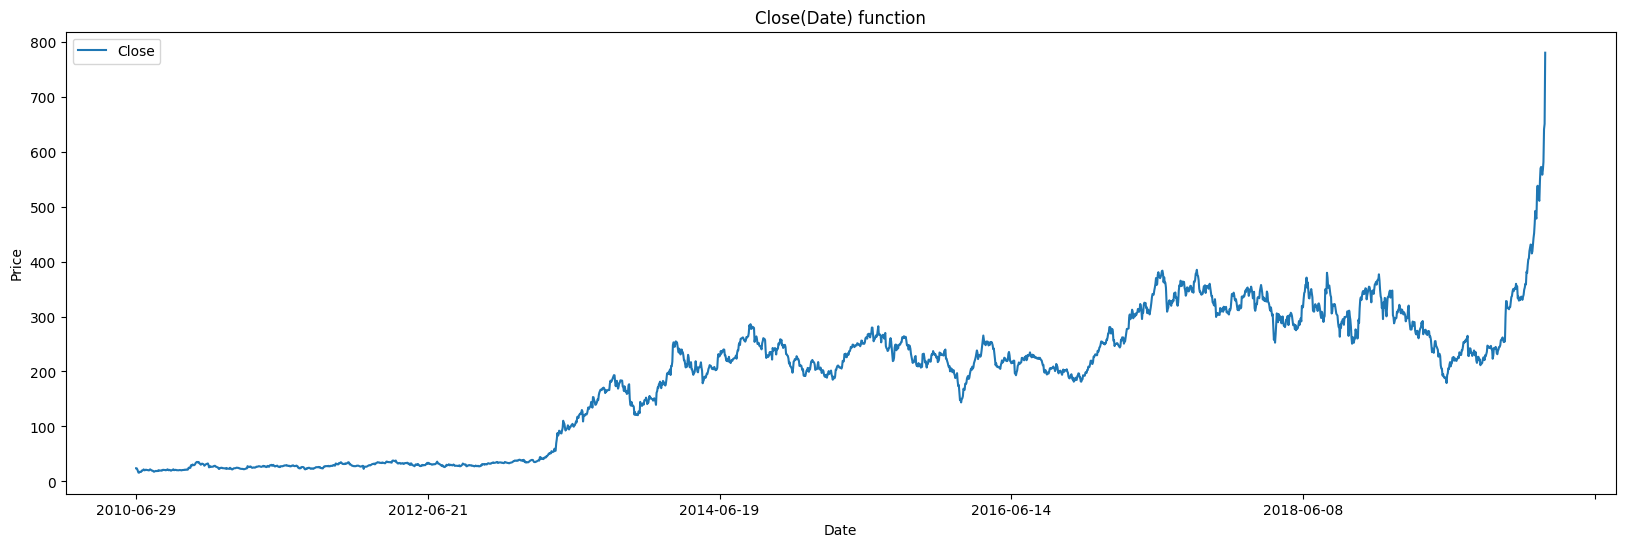

In [126]:
df.plot(x="Date", y="Close", ylabel="Price", title="Close(Date) function", figsize = (20, 6))

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [47]:
maxValue = df["Open"].max()
minValue = df["Open"].min()
df["Open"].apply(lambda x: (x-minValue)/(maxValue-minValue))

0       0.004349
1       0.014676
2       0.013474
3       0.010433
4       0.005870
          ...   
2411    0.840012
2412    0.850962
2413    0.937237
2414    0.948764
2415    1.000000
Name: Open, Length: 2416, dtype: float64

5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

<Axes: title={'center': 'SMA12'}>

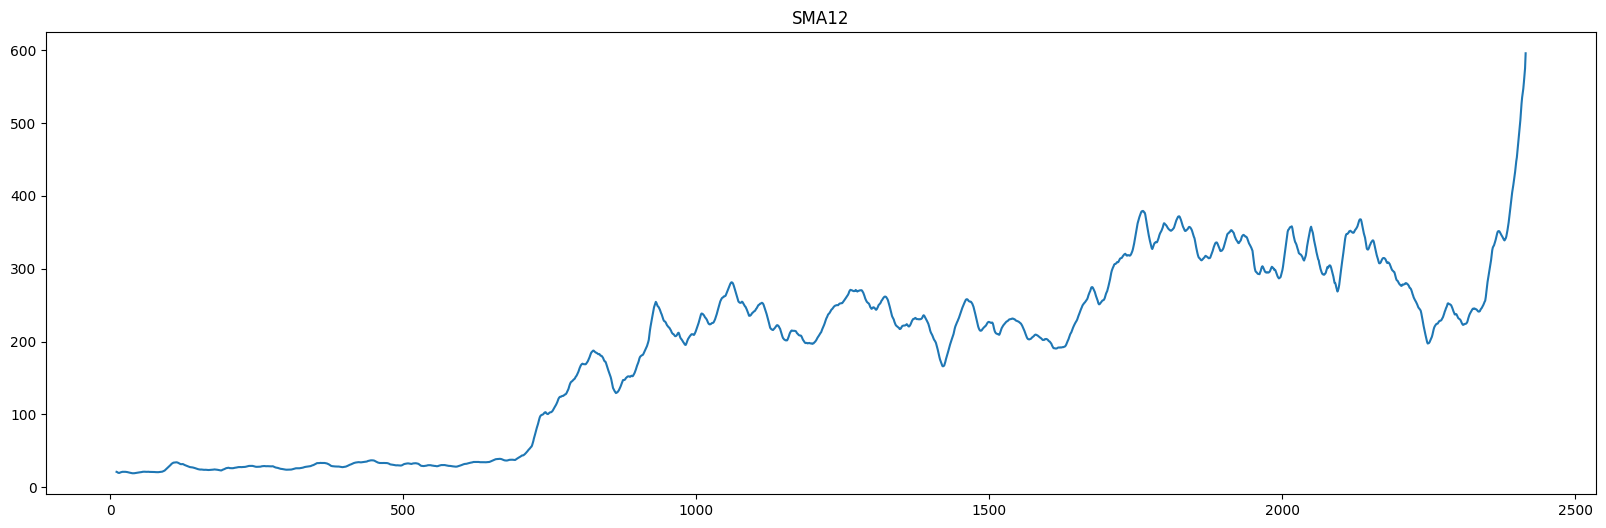

In [132]:
df['SMA12'] = df['High'].rolling(window =12).mean()
df['SMA12'].plot(figsize = (20, 6), title="SMA12")

<Axes: title={'center': 'SMA15'}>

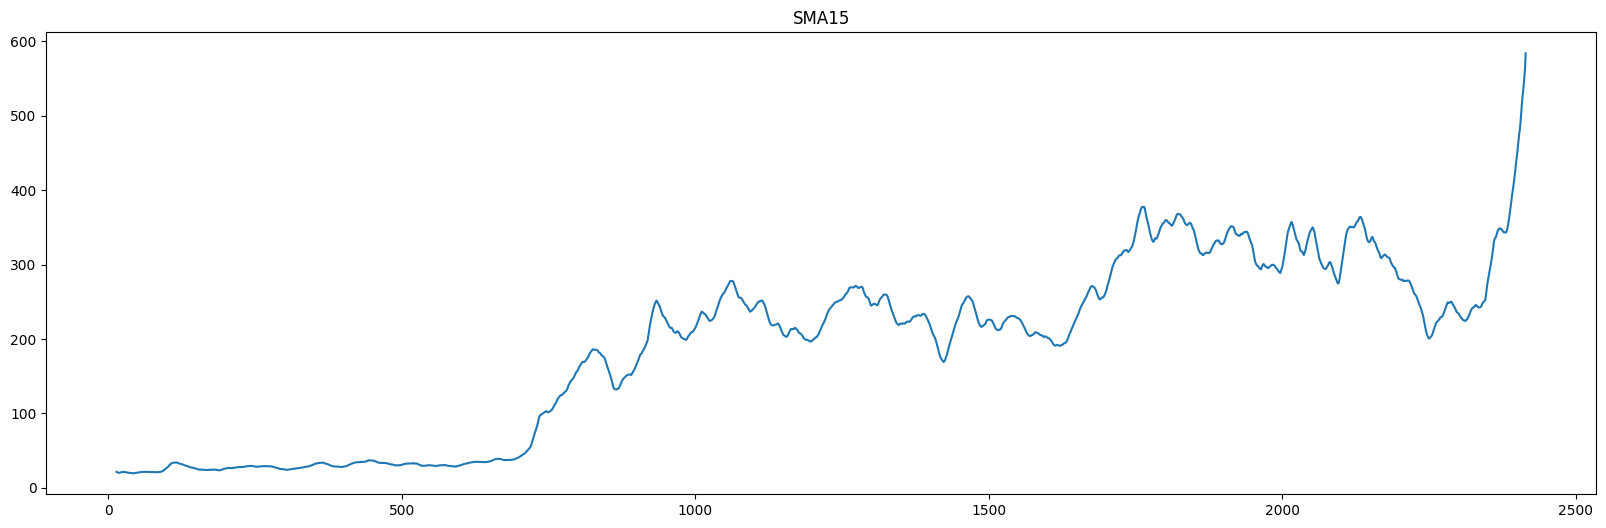

In [133]:
df['SMA15'] = df['High'].rolling(window =15).mean()
df['SMA15'].plot(figsize = (20, 6), title="SMA15")

<Axes: title={'center': 'SMA30'}>

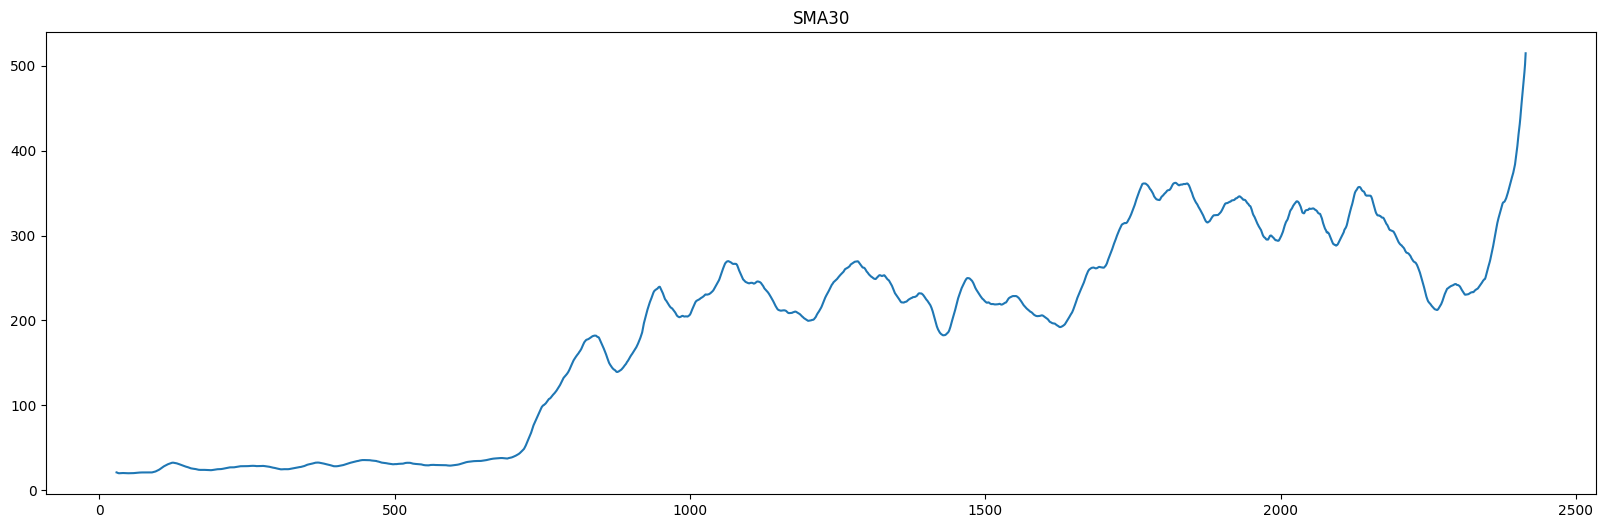

In [134]:
df['SMA30'] = df['High'].rolling(window =30).mean()
df['SMA30'].plot(figsize = (20, 6), title="SMA30")

<Axes: title={'center': 'SMA100'}>

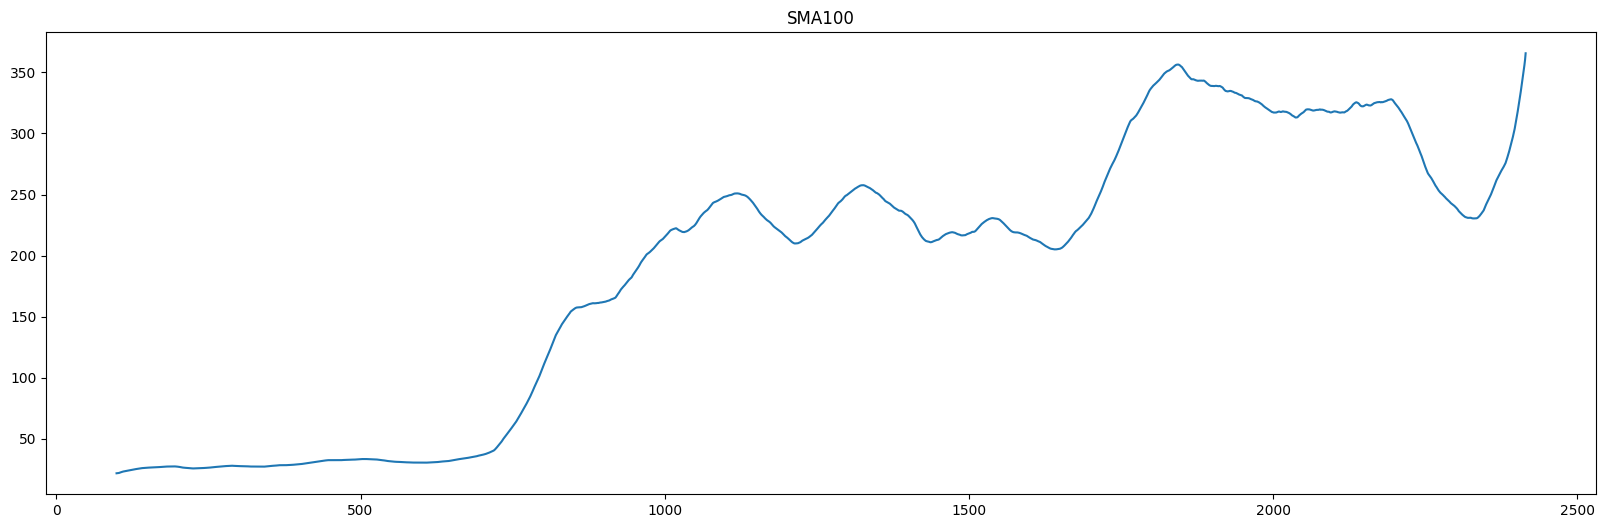

In [135]:
df['High'].rolling(window =100).mean().plot(figsize = (20, 6), title="SMA100")

6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

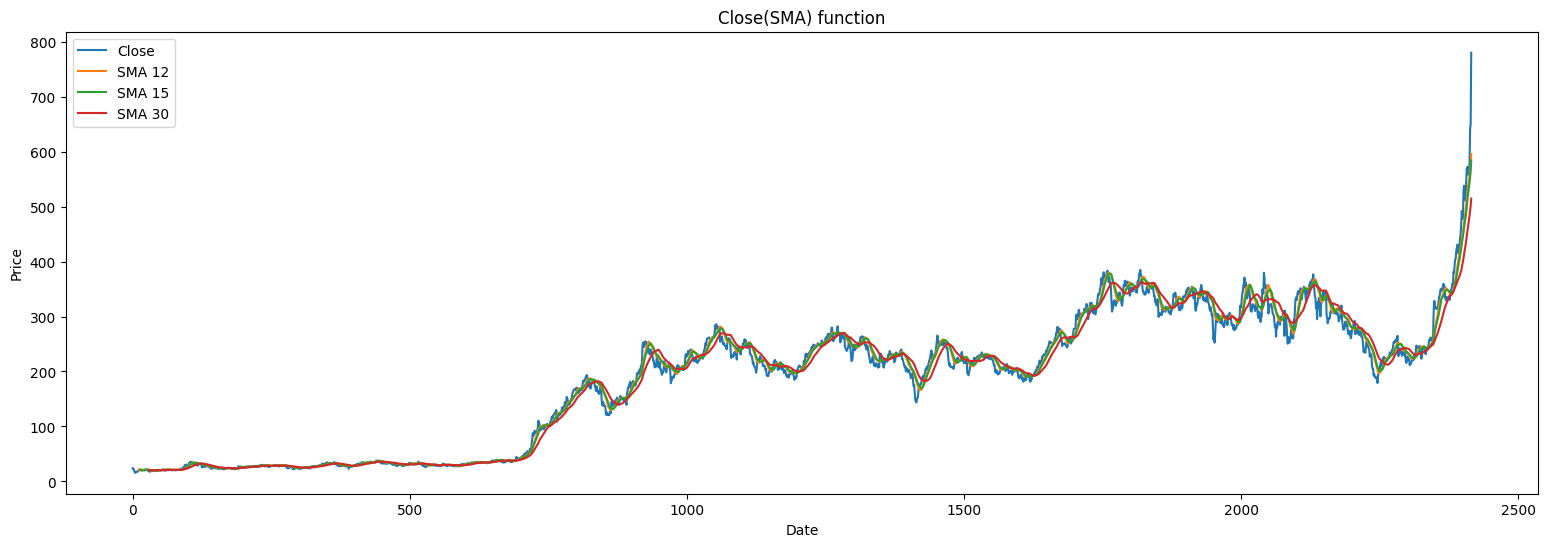

In [142]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(df.index, df['Close'], label='Close')
ax.plot(df.index, df["SMA12"], label='SMA 12')
ax.plot(df.index, df["SMA15"], label='SMA 15')
ax.plot(df.index, df["SMA30"], label='SMA 30')
ax.legend()
ax.set_title('Close(SMA) function')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()